In [1]:
gROOT->ProcessLine(".x Lib.C");

(int) 0


In [2]:
Harry::Plotter *MuSize = new Harry::Plotter("demo/VLFTree",{"@AnaMuons.size()"},4,0,4);
Harry::Plotter *MuPt = new Harry::Plotter ("demo/VLFTree",{"AnaMuons.Pt()"},35,0,60);
Harry::Plotter *Mt = new Harry::Plotter("demo/VLFTree",{"MT_LeadingMuon_MET"},45,0,90); 
Harry::Plotter *JetSize = new Harry::Plotter("demo/VLFTree",{"@AnaJets.size()"},10,0,10);
Harry::Plotter *METMt = new Harry::Plotter("demo/VLFTree",{"AnaMET.Mt()"},35,60,400);
//p.SetVerbose(true);

In [3]:
std::vector<Harry::Plotter *> PlotVec;
PlotVec.push_back(MuSize);
PlotVec.push_back(MuPt);
PlotVec.push_back(Mt);
PlotVec.push_back(JetSize);
PlotVec.push_back(METMt);

In [4]:
for(auto p: PlotVec) {
    p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/Signal.root","Signal",0.331);
//DY
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/DYJetsToLL_HT/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/",
        "DY",1.318077913);
//Single Top
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_s-channel_4f_leptonDecays_13TeV-amcatnlo-pythia8_TuneCUETP8M1",
        "ST",0.336);//30
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_t-channel_antitop_4f_inclusiveDecays_TuneCUETP8M2T4_13TeV-powhegV2-madspin",
        "ST",0.2658808098);//30
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_t-channel_top_4f_inclusiveDecays_TuneCUETP8M2T4_13TeV-powhegV2-madspin",
        "ST",0.2658808098);//45
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_tW_antitop_5f_inclusiveDecays_13TeV-powheg-pythia8_TuneCUETP8M1",
        "ST",0.2743065568);//120
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_tW_top_5f_inclusiveDecays_13TeV-powheg-pythia8_TuneCUETP8M1",
        "ST",0.2743065568);
//TT
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/TTToLL_MLL/TT_TuneCUETP8M2T4_13TeV-powheg-pythia8",
        "TT",1.07907048);
//W+Jets
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-70To100_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",163.713);//max20000
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-100To200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",16.12246515);//max 160000
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-200To400_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",0.5484566297);//4000
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-400To600_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",0.1491425684);//200
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-600To800_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",0.1879002812);
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-800To1200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",0.03561855317);
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-1200To2500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",0.02339910957);
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-2500ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8",
        "WPlusJets",0.001475217613); //max
    
}

In [5]:
TCanvas c;

In [6]:
std::map<std::string, std::map<std::string, Double_t> > CutFlow;
//Map to count events
std::map<std::string, Double_t> temp;

In [7]:
//Cuts
std::string cut0="@AnaMuons.size()==1";
std::string cut1=cut0+"&&AnaMuons.Pt()<30";
std::string cut2=cut1+"&&MT_LeadingMuon_MET<65";
std::string cut3=cut2+"&&@AnaJets.size()<4";

## Muon Size

In [8]:
auto MuSize_hplots = MuSize->GetPlots();

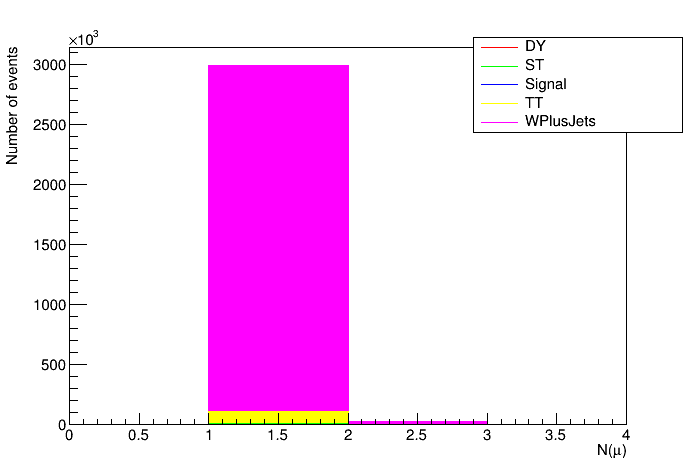

In [9]:
MuSize_hplots["@AnaMuons.size()"].first->Draw("Histo"); //HStack object
MuSize_hplots["@AnaMuons.size()"].first->GetXaxis()->SetTitle("N(#mu)");
MuSize_hplots["@AnaMuons.size()"].first->GetYaxis()->SetTitle("Number of events");
MuSize_hplots["@AnaMuons.size()"].first->SetTitle("");
MuSize_hplots["@AnaMuons.size()"].second->Draw(); //Legend object
c.Draw();

In [10]:
//c.SaveAs("Plots_PDF/MuSizeStack.pdf","pdf");

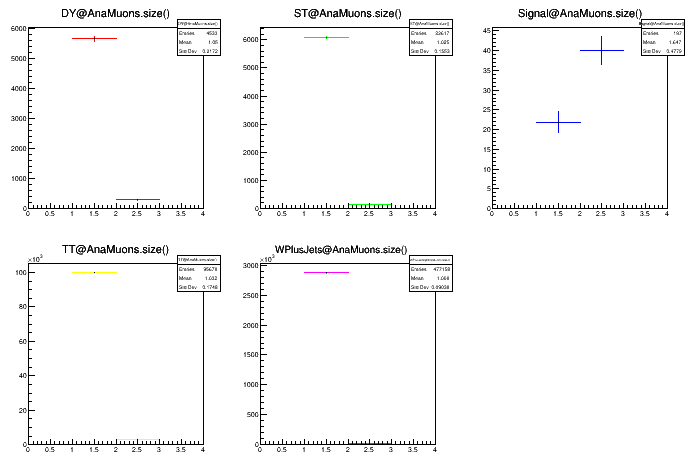

In [11]:
MuSize_hplots["@AnaMuons.size()"].first->Draw("PADS"); //HStack object
MuSize_hplots["@AnaMuons.size()"].first->SetTitle("");
MuSize_hplots["@AnaMuons.size()"].second->Draw(); //Legend object
c.Draw();

### Significance

In [12]:
auto MuSizeHist=MuSize->GetHists();

In [13]:
//Vector of the TH1D Background, as
std::vector<TH1D *> BackgroundMuS;
BackgroundMuS.push_back((TH1D *)MuSizeHist["@AnaMuons.size()"].first.at(0));
BackgroundMuS.push_back((TH1D *)MuSizeHist["@AnaMuons.size()"].first.at(1));
BackgroundMuS.push_back((TH1D *)MuSizeHist["@AnaMuons.size()"].first.at(3));
BackgroundMuS.push_back((TH1D *)MuSizeHist["@AnaMuons.size()"].first.at(4));

In [14]:
temp["DY"]=MuSizeHist["@AnaMuons.size()"].first.at(0)->Integral();
temp["ST"]=MuSizeHist["@AnaMuons.size()"].first.at(1)->Integral();
temp["TT"]=MuSizeHist["@AnaMuons.size()"].first.at(3)->Integral();
temp["WJ"]=MuSizeHist["@AnaMuons.size()"].first.at(4)->Integral();
temp["Signal"]=MuSizeHist["@AnaMuons.size()"].first.at(2)->Integral();

In [15]:
CutFlow["Cut0"]=temp;

In [16]:
//temp["TT"]
//CutFlow["Cut0"]

In [17]:
Significance Muon_Size_TH=Significance((TH1D *)MuSizeHist["@AnaMuons.size()"].first.at(2),BackgroundMuS);
TH1D * Muon_Size_THDraw=Muon_Size_TH.GetSigLessThan();

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


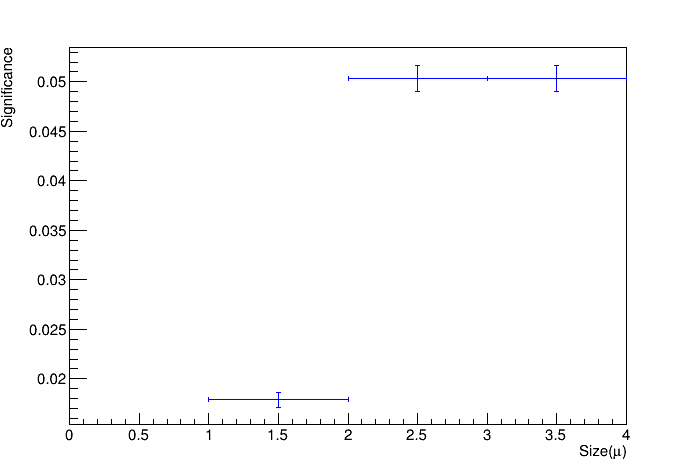

In [18]:
Muon_Size_THDraw->Draw("E1");
Muon_Size_THDraw->SetTitle("");
Muon_Size_THDraw->GetXaxis()->SetTitle("Size(#mu)");
Muon_Size_THDraw->GetYaxis()->SetTitle("Significance");
c.Draw();

In [19]:
//c.SaveAs("Plots_PDF/MuSizeSignificance.pdf","pdf");

### efficency plots

In [20]:
//Get The efficency plots
std::vector<TH1D *> Muon_Size_Eff_THDraw = Muon_Size_TH.GetEffLessThan();

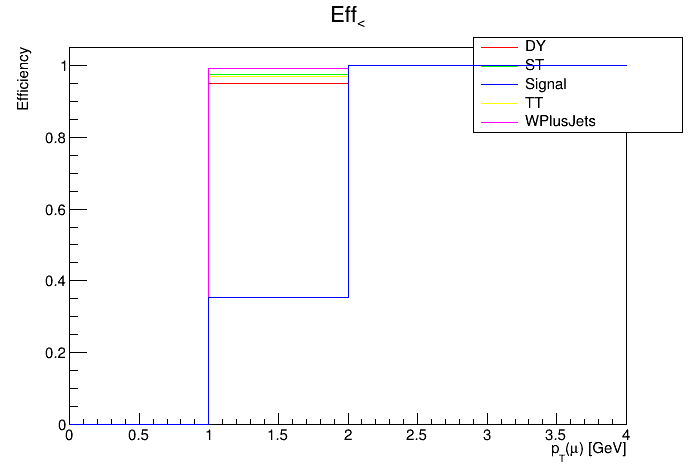

In [21]:
//Muon_Pt_Eff_THDraw[0]->SetFillStyle(4050);
Muon_Size_Eff_THDraw[0]->SetFillColor(0);
Muon_Size_Eff_THDraw[0]->Draw("E");
Muon_Size_Eff_THDraw[0]->SetTitle("Eff_{<}");
Muon_Size_Eff_THDraw[0]->GetXaxis()->SetTitle("p_{T}(#mu) [GeV]");
Muon_Size_Eff_THDraw[0]->GetYaxis()->SetTitle("Efficiency");
MuSize_hplots["@AnaMuons.size()"].second->Draw(); //Legend object
//Muon_Pt_Eff_THDraw[1]->SetFillStyle(4050);
Muon_Size_Eff_THDraw[1]->SetFillColor(0);
Muon_Size_Eff_THDraw[1]->Draw("same E");
//Muon_Pt_Eff_THDraw[2]->SetFillStyle(4050);
Muon_Size_Eff_THDraw[2]->SetFillColor(0);
Muon_Size_Eff_THDraw[2]->Draw("same E");
//Muon_Pt_Eff_THDraw[3]->SetFillStyle(4050);
Muon_Size_Eff_THDraw[3]->SetFillColor(0);
Muon_Size_Eff_THDraw[3]->Draw("same E");
//Muon_Pt_Eff_THDraw[4]->SetFillStyle(4050);
Muon_Size_Eff_THDraw[4]->SetFillColor(0);
Muon_Size_Eff_THDraw[4]->Draw("same E");
c.Draw();

In [22]:
//c.SaveAs("Plots_PDF/MuSizeEff.pdf","pdf");

## $p_T(\mu)$

In [23]:
MuPt->SetCut(cut0.c_str());

In [24]:
auto MuPt_hplots = MuPt->GetPlots();

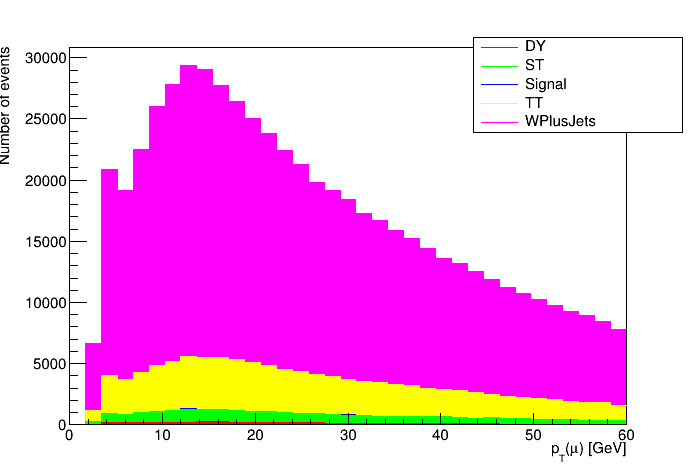

In [25]:
MuPt_hplots["AnaMuons.Pt()"].first->Draw("Histo"); //HStack object
MuPt_hplots["AnaMuons.Pt()"].first->GetXaxis()->SetTitle("p_{T}(#mu) [GeV]");
MuPt_hplots["AnaMuons.Pt()"].first->GetYaxis()->SetTitle("Number of events");
MuPt_hplots["AnaMuons.Pt()"].first->SetTitle("");
MuPt_hplots["AnaMuons.Pt()"].second->Draw(); //Legend object
c.Draw();

In [26]:
//c.SaveAs("Plots_PDF/MuPtStack.pdf","pdf");

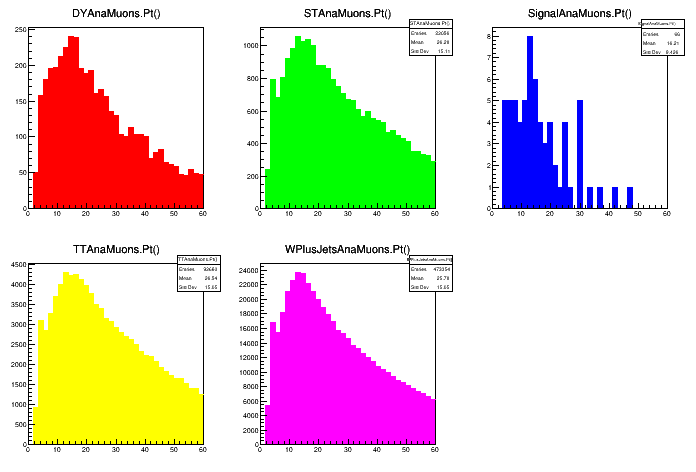

In [27]:
MuPt_hplots["AnaMuons.Pt()"].first->GetXaxis()->SetTitle("p_{T}(#mu) [GeV]");
MuPt_hplots["AnaMuons.Pt()"].first->GetYaxis()->SetTitle("Number of events");
MuPt_hplots["AnaMuons.Pt()"].first->SetTitle("");
MuPt_hplots["AnaMuons.Pt()"].first->Draw("PADS"); //HStack object
MuPt_hplots["AnaMuons.Pt()"].second->Draw(); //Legend object
c.Draw();

In [28]:
//c.SaveAs("Plots_PDF/MuPtAll.pdf","pdf");

### Significance

In [29]:
auto MuPtHist = MuPt->GetHists();

In [30]:
//Vector of the TH1D Background, as
std::vector<TH1D *> BackgroundMuPt;
BackgroundMuPt.push_back((TH1D *)MuPtHist["AnaMuons.Pt()"].first.at(0));
BackgroundMuPt.push_back((TH1D *)MuPtHist["AnaMuons.Pt()"].first.at(1));
BackgroundMuPt.push_back((TH1D *)MuPtHist["AnaMuons.Pt()"].first.at(3));
BackgroundMuPt.push_back((TH1D *)MuPtHist["AnaMuons.Pt()"].first.at(4));

In [31]:
temp["DY"]=MuPtHist["AnaMuons.Pt()"].first.at(0)->Integral();
temp["ST"]=MuPtHist["AnaMuons.Pt()"].first.at(1)->Integral();
temp["TT"]=MuPtHist["AnaMuons.Pt()"].first.at(3)->Integral();
temp["WJ"]=MuPtHist["AnaMuons.Pt()"].first.at(4)->Integral();
temp["Signal"]=MuPtHist["AnaMuons.Pt()"].first.at(2)->Integral();

In [32]:
CutFlow["Cut1"]=temp;

In [33]:
//CutFlow["Cut1"]

In [34]:
Significance Muon_Pt_TH=Significance((TH1D *)MuPtHist["AnaMuons.Pt()"].first.at(2),BackgroundMuPt);
TH1D * Muon_Pt_THDraw=Muon_Pt_TH.GetSigLessThan();

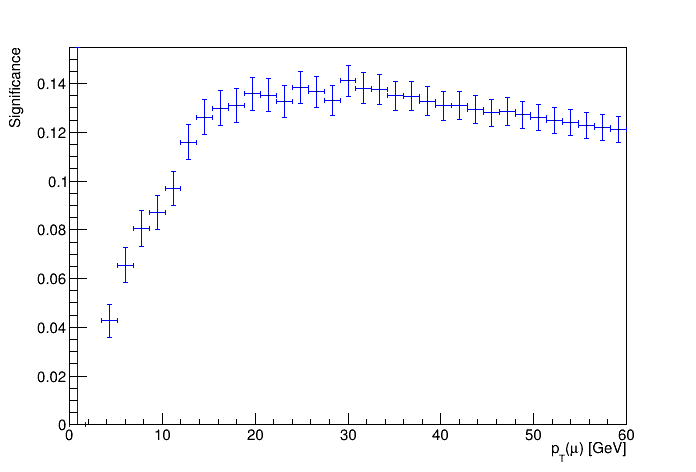

In [35]:
Muon_Pt_THDraw->Draw("E1");
Muon_Pt_THDraw->SetTitle("");
Muon_Pt_THDraw->GetXaxis()->SetTitle("p_{T}(#mu) [GeV]");
Muon_Pt_THDraw->GetYaxis()->SetTitle("Significance");
c.Draw();

In [36]:
//c.SaveAs("Plots_PDF/MuPtSignificance.pdf","pdf");

### efficency plots

In [37]:
//Get The efficency plots
std::vector<TH1D *> Muon_Pt_Eff_THDraw = Muon_Pt_TH.GetEffLessThan();

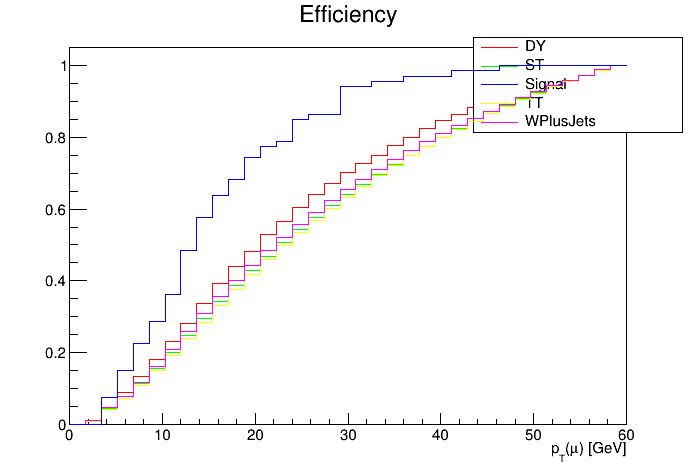

In [38]:
Muon_Pt_Eff_THDraw[0]->SetFillColor(0);
Muon_Pt_Eff_THDraw[0]->Draw("E");
Muon_Pt_Eff_THDraw[0]->GetXaxis()->SetTitle("p_{T}(#mu) [GeV]");
Muon_Pt_Eff_THDraw[0]->GetYaxis()->SetTitle("");
MuPt_hplots["AnaMuons.Pt()"].second->Draw(); //Legend object;
Muon_Pt_Eff_THDraw[1]->SetFillColor(0);
Muon_Pt_Eff_THDraw[1]->Draw("same E");
Muon_Pt_Eff_THDraw[2]->SetFillColor(0);
Muon_Pt_Eff_THDraw[2]->Draw("same E");
Muon_Pt_Eff_THDraw[3]->SetFillColor(0);
Muon_Pt_Eff_THDraw[3]->Draw("same E");
Muon_Pt_Eff_THDraw[4]->SetFillColor(0);
Muon_Pt_Eff_THDraw[4]->Draw("same E");
c.Draw();

In [39]:
//c.SaveAs("Plots_PDF/MuPtEff.pdf","pdf");

## $M_{T}(\mu,p_{T}^{miss})$

In [40]:
Mt->SetCut(cut1.c_str());

In [41]:
auto Mt_hplots = Mt->GetPlots();

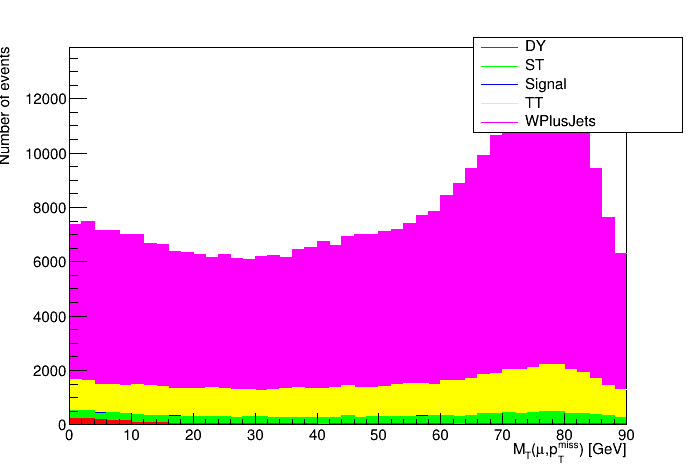

In [42]:
Mt_hplots["MT_LeadingMuon_MET"].first->Draw("Histo"); //HStack object
Mt_hplots["MT_LeadingMuon_MET"].first->GetXaxis()->SetTitle("M_{T}(#mu,p_{T}^{miss}) [GeV]");
Mt_hplots["MT_LeadingMuon_MET"].first->GetYaxis()->SetTitle("Number of events");
Mt_hplots["MT_LeadingMuon_MET"].first->SetTitle("");
Mt_hplots["MT_LeadingMuon_MET"].second->Draw(); //Legend object
c.Draw();

In [43]:
//c.SaveAs("Plots_PDF/MtStack.pdf","pdf");

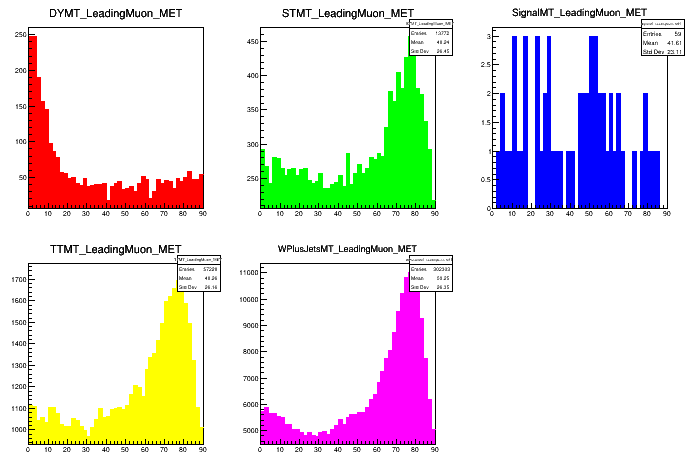

In [44]:
Mt_hplots["MT_LeadingMuon_MET"].first->Draw("PADS"); //HStack object
Mt_hplots["MT_LeadingMuon_MET"].first->SetTitle("");
Mt_hplots["MT_LeadingMuon_MET"].second->Draw(); //Legend object
c.Draw();

In [45]:
//c.SaveAs("Plots_PDF/MtAll.pdf","pdf");

### Significance

In [46]:
auto MtHist = Mt->GetHists();

In [47]:
//Vector of the TH1D Background, as
std::vector<TH1D *> BackgroundMt;
BackgroundMt.push_back((TH1D *)MtHist["MT_LeadingMuon_MET"].first.at(0));
BackgroundMt.push_back((TH1D *)MtHist["MT_LeadingMuon_MET"].first.at(1));
BackgroundMt.push_back((TH1D *)MtHist["MT_LeadingMuon_MET"].first.at(3));
BackgroundMt.push_back((TH1D *)MtHist["MT_LeadingMuon_MET"].first.at(4));

In [48]:
temp["DY"]=MtHist["MT_LeadingMuon_MET"].first.at(0)->Integral();
temp["ST"]=MtHist["MT_LeadingMuon_MET"].first.at(1)->Integral();
temp["TT"]=MtHist["MT_LeadingMuon_MET"].first.at(3)->Integral();
temp["WJ"]=MtHist["MT_LeadingMuon_MET"].first.at(4)->Integral();
temp["Signal"]=MtHist["MT_LeadingMuon_MET"].first.at(2)->Integral();

In [49]:
CutFlow["Cut2"]=temp;

In [50]:
//CutFlow["Cut2"]

In [51]:
Significance Mt_TH=Significance((TH1D *)MtHist["MT_LeadingMuon_MET"].first.at(2),BackgroundMt);
TH1D * Mt_THDraw=Mt_TH.GetSigLessThan();

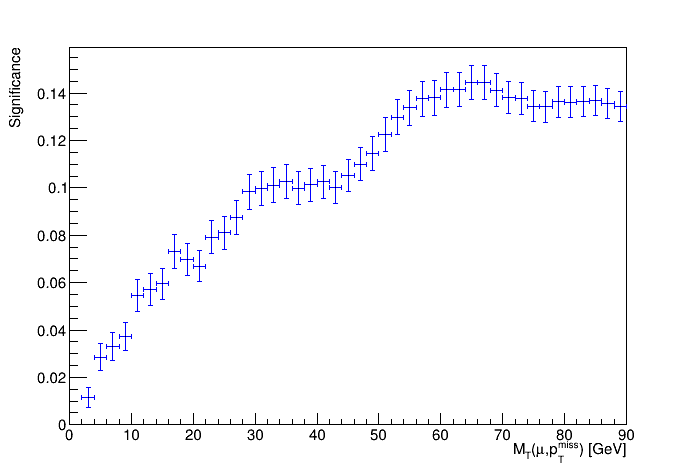

In [52]:
Mt_THDraw->Draw("E1");
Mt_THDraw->SetTitle("");
Mt_THDraw->GetXaxis()->SetTitle("M_{T}(#mu,p_{T}^{miss}) [GeV]");
Mt_THDraw->GetYaxis()->SetTitle("Significance");
c.Draw();

In [53]:
//c.SaveAs("Plots_PDF/MtSignificance.pdf","pdf");

### Efficiency

In [54]:
//Get The efficency plots
std::vector<TH1D *> Mt_Eff_THDraw = Mt_TH.GetEffLessThan();

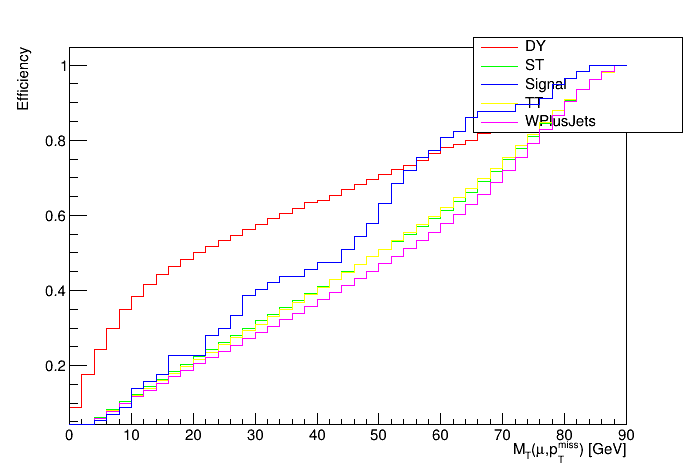

In [55]:
Mt_Eff_THDraw[0]->SetFillColor(0);
Mt_Eff_THDraw[0]->Draw("E");
Mt_Eff_THDraw[0]->SetTitle("");
Mt_Eff_THDraw[0]->GetXaxis()->SetTitle("M_{T}(#mu,p_{T}^{miss}) [GeV]");
Mt_Eff_THDraw[0]->GetYaxis()->SetTitle("Efficiency");
Mt_hplots["MT_LeadingMuon_MET"].second->Draw(); //Legend object
Mt_Eff_THDraw[1]->SetFillColor(0);
Mt_Eff_THDraw[1]->Draw("same E");
Mt_Eff_THDraw[2]->SetFillColor(0);
Mt_Eff_THDraw[2]->Draw("same E");
Mt_Eff_THDraw[3]->SetFillColor(0);
Mt_Eff_THDraw[3]->Draw("same E");
Mt_Eff_THDraw[4]->SetFillColor(0);
Mt_Eff_THDraw[4]->Draw("same E");
c.Draw();

In [56]:
//c.SaveAs("Plots_PDF/MtEff.pdf","pdf");

## $N(Jet)$

In [57]:
JetSize->SetCut(cut2.c_str());

In [58]:
auto JetSize_hplots = JetSize->GetPlots();

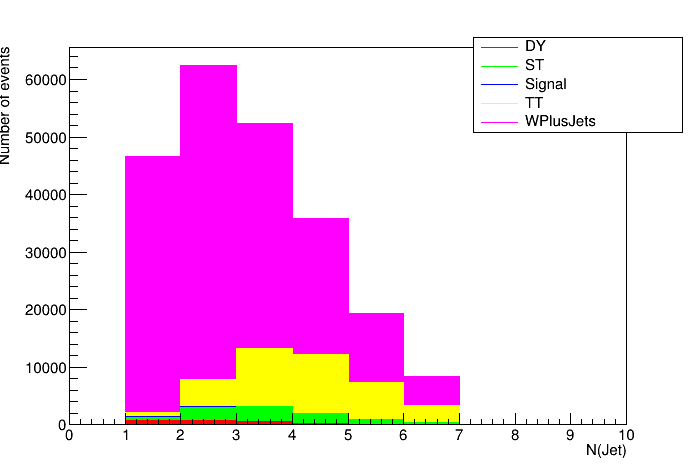

In [59]:
JetSize_hplots["@AnaJets.size()"].first->Draw("Histo"); //HStack object
JetSize_hplots["@AnaJets.size()"].first->GetXaxis()->SetTitle("N(Jet)");
JetSize_hplots["@AnaJets.size()"].first->GetYaxis()->SetTitle("Number of events");
JetSize_hplots["@AnaJets.size()"].first->SetTitle("");
JetSize_hplots["@AnaJets.size()"].second->Draw(); //Legend object
c.Draw();

In [60]:
//c.SaveAs("Plots_PDF/JetSizeStack.pdf","pdf");

### Significance

In [61]:
auto JetSizeHist = JetSize->GetHists();

In [62]:
//Vector of the TH1D Background, as
std::vector<TH1D *> BackgroundJetSize;
BackgroundJetSize.push_back((TH1D *)JetSizeHist["@AnaJets.size()"].first.at(0));
BackgroundJetSize.push_back((TH1D *)JetSizeHist["@AnaJets.size()"].first.at(1));
BackgroundJetSize.push_back((TH1D *)JetSizeHist["@AnaJets.size()"].first.at(3));
BackgroundJetSize.push_back((TH1D *)JetSizeHist["@AnaJets.size()"].first.at(4));

In [63]:
temp["DY"]=JetSizeHist["@AnaJets.size()"].first.at(0)->Integral();
temp["ST"]=JetSizeHist["@AnaJets.size()"].first.at(1)->Integral();
temp["TT"]=JetSizeHist["@AnaJets.size()"].first.at(3)->Integral();
temp["WJ"]=JetSizeHist["@AnaJets.size()"].first.at(4)->Integral();
temp["Signal"]=JetSizeHist["@AnaJets.size()"].first.at(2)->Integral();

In [64]:
CutFlow["Cut3"]=temp;

In [65]:
//CutFlow["Cut3"]

In [66]:
Significance Jet_Size_TH=Significance((TH1D *)JetSizeHist["@AnaJets.size()"].first.at(2),BackgroundJetSize);
TH1D * Jet_Size_THDraw=Jet_Size_TH.GetSigLessThan();

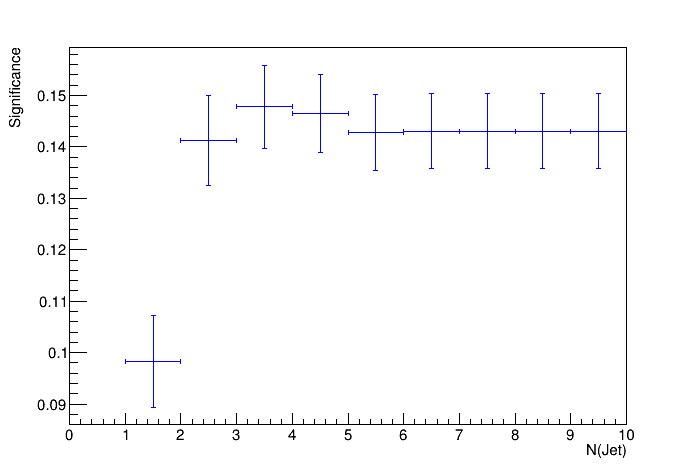

In [67]:
Jet_Size_THDraw->Draw("E1");
Jet_Size_THDraw->SetTitle("");
Jet_Size_THDraw->GetXaxis()->SetTitle("N(Jet)");
Jet_Size_THDraw->GetYaxis()->SetTitle("Significance");
c.Draw();

In [68]:
//c.SaveAs("Plots_PDF/JetSizeSignificance.pdf","pdf");

### Efficiency

In [69]:
//Get The efficency plots
std::vector<TH1D *> Jet_Size_Eff_THDraw = Jet_Size_TH.GetEffLessThan();

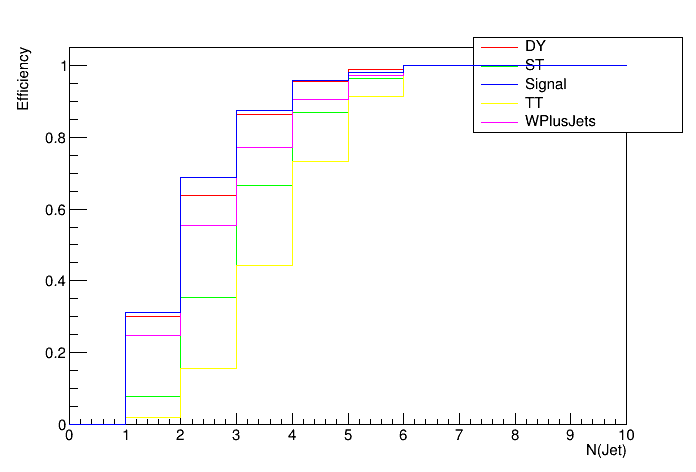

In [70]:
Jet_Size_Eff_THDraw[0]->SetFillColor(0);
Jet_Size_Eff_THDraw[0]->Draw("E");
Jet_Size_Eff_THDraw[0]->SetTitle("");
Jet_Size_Eff_THDraw[0]->GetXaxis()->SetTitle("N(Jet)");
Jet_Size_Eff_THDraw[0]->GetYaxis()->SetTitle("Efficiency");
JetSize_hplots["@AnaJets.size()"].second->Draw(); //Legend object
Jet_Size_Eff_THDraw[1]->SetFillColor(0);
Jet_Size_Eff_THDraw[1]->Draw("same E");
Jet_Size_Eff_THDraw[2]->SetFillColor(0);
Jet_Size_Eff_THDraw[2]->Draw("same E");
Jet_Size_Eff_THDraw[3]->SetFillColor(0);
Jet_Size_Eff_THDraw[3]->Draw("same E");
Jet_Size_Eff_THDraw[4]->SetFillColor(0);
Jet_Size_Eff_THDraw[4]->Draw("same E");
c.Draw();

In [71]:
//c.SaveAs("Plots_PDF/JetSizeEff.pdf","pdf");

##  $M_T(MET)$

In [72]:
METMt->SetCut(cut3.c_str());

In [73]:
auto METMt_hplots = METMt->GetPlots();

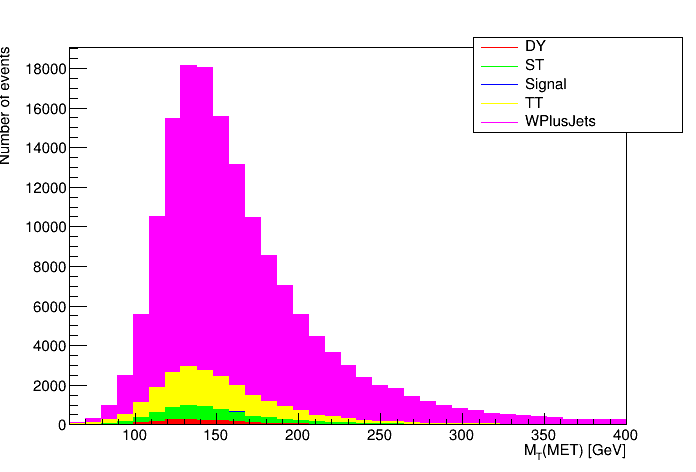

In [74]:
METMt_hplots["AnaMET.Mt()"].first->Draw("Histo"); //HStack object
METMt_hplots["AnaMET.Mt()"].first->GetXaxis()->SetTitle("M_{T}(MET) [GeV]");
METMt_hplots["AnaMET.Mt()"].first->GetYaxis()->SetTitle("Number of events");
METMt_hplots["AnaMET.Mt()"].first->SetTitle("");
METMt_hplots["AnaMET.Mt()"].second->Draw(); //Legend object
c.Draw();

### Significance

In [75]:
auto METMtHist = METMt->GetHists();

In [76]:
//Vector of the TH1D Background, as
std::vector<TH1D *> BackgroundMETMt;
BackgroundMETMt.push_back((TH1D *)METMtHist["AnaMET.Mt()"].first.at(0));
BackgroundMETMt.push_back((TH1D *)METMtHist["AnaMET.Mt()"].first.at(1));
BackgroundMETMt.push_back((TH1D *)METMtHist["AnaMET.Mt()"].first.at(3));
BackgroundMETMt.push_back((TH1D *)METMtHist["AnaMET.Mt()"].first.at(4));

In [77]:
temp["DY"]=METMtHist["AnaMET.Mt()"].first.at(0)->Integral();
temp["ST"]=METMtHist["AnaMET.Mt()"].first.at(1)->Integral();
temp["TT"]=METMtHist["AnaMET.Mt()"].first.at(3)->Integral();
temp["WJ"]=METMtHist["AnaMET.Mt()"].first.at(4)->Integral();
temp["Signal"]=METMtHist["AnaMET.Mt()"].first.at(2)->Integral();

In [78]:
CutFlow["Final"]=temp;

In [79]:
// Create a map iterator and point to beginning of map
std::map<std::string, std::map<std::string, Double_t> >::iterator it = CutFlow.begin();
 
// Iterate over the map using Iterator till end.
while (it != CutFlow.end())
{
    // Accessing KEY from element pointed by it.
    std::string Cut = it->first;
    std::cout<< "-------------------------------" <<std::endl;
    std::cout<< "-----------" <<Cut << "----------------" <<std::endl;
    std::cout<< "-------------------------------" <<std::endl;

    // Accessing VALUE from element pointed by it.
    std::map<std::string, Double_t> map2 = it->second;
    
    // Create a map iterator and point to beginning of map
    std::map<std::string, Double_t>::iterator other = map2.begin();
    while (other != map2.end())
    {
        // Accessing KEY from element pointed by other.
        std::string sig = other->first;
        // Accessing VALUE from element pointed by it.
        int count = other->second;
        std::cout << "        " <<other->first << " ...... " << count <<std::endl;
        // Increment the Iterator to point to next entry
        other++;
            
    }
    // Increment the Iterator to point to next entry
    it++;
}

-------------------------------
-----------Cut0----------------
-------------------------------
        DY ...... 11949
        ST ...... 12494
        Signal ...... 123
        TT ...... 206485
        WJ ...... 5806931
-------------------------------
-----------Cut1----------------
-------------------------------
        DY ...... 8616
        ST ...... 44112
        Signal ...... 132
        TT ...... 185320
        WJ ...... 946708
-------------------------------
-----------Cut2----------------
-------------------------------
        DY ...... 5636
        ST ...... 26228
        Signal ...... 114
        TT ...... 107990
        WJ ...... 581292
-------------------------------
-----------Cut3----------------
-------------------------------
        DY ...... 4470
        ST ...... 16982
        Signal ...... 96
        TT ...... 71122
        WJ ...... 357458
-------------------------------
-----------Final----------------
-------------------------------
        DY ...... 3858
    